In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import pandas as pd

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 

In [5]:
fo = '/chinook/cruman/Data/Near0EventsCases'
# Get the average number of hours near 0
ctrl_minus8 = np.zeros((14,12,1015,1359))
ctrl_minus4 = np.zeros((14,12,1015,1359))
ctrl_near0 = np.zeros((14,12,1015,1359))
pgw_near0 = np.zeros((14,12,1015,1359))
near0PGW_near0CTRL = np.zeros((14,12,1015,1359))
near0PGW_m4CTRL = np.zeros((14,12,1015,1359))
near0PGW_m8CTRL = np.zeros((14,12,1015,1359))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_minus8CTRL_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f"{fo}/t2m_minus4CTRL_{y}_{m:02d}.p", "rb"))
        aux3 = pickle.load( open(f'{fo}/t2m_near0CTRL_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_near0PGW_{y}_{m:02d}.p', 'rb'))
        aux5 = pickle.load( open(f'{fo}/t2m_n0PGW_n0CTRL_{y}_{m:02d}.p', 'rb'))
        aux6 = pickle.load( open(f'{fo}/t2m_n0PGW_m4CTRL_{y}_{m:02d}.p', 'rb'))
        aux7 = pickle.load( open(f'{fo}/t2m_n0PGW_m8CTRL_{y}_{m:02d}.p', 'rb'))
        
        ctrl_minus8[i,m-1] += aux        
        ctrl_minus4[i,m-1] += aux2
        ctrl_near0[i,m-1] += aux3
        pgw_near0[i,m-1] += aux4
        near0PGW_near0CTRL[i,m-1] += aux5
        near0PGW_m4CTRL[i,m-1] += aux6
        near0PGW_m8CTRL[i,m-1] += aux7
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [6]:
def removeCorners(aux, n=25):
    aux[:n,:] = np.nan
    aux[:,:n] = np.nan
    aux[-n:,:] = np.nan
    aux[:,-n:] = np.nan
    
    return aux

In [7]:
total_ctrl_minus8_month = np.sum(ctrl_minus8, axis=0)
total_ctrl_minus4_month = np.sum(ctrl_minus4, axis=0)
total_ctrl_near0_month = np.sum(ctrl_near0, axis=0)
total_pgw_near0_month = np.sum(pgw_near0, axis=0)
total_near0PGW_near0CTRL_month = np.sum(near0PGW_near0CTRL, axis=0)
total_near0PGW_m4CTRL_month = np.sum(near0PGW_m4CTRL, axis=0)
total_near0PGW_m8CTRL_month = np.sum(near0PGW_m8CTRL, axis=0)

total_ctrl_minus8 = np.sum(total_ctrl_minus8_month, axis=0)
total_ctrl_minus4 = np.sum(total_ctrl_minus4_month, axis=0)
total_ctrl_near0 = np.sum(total_ctrl_near0_month, axis=0)
total_pgw_near0 = np.sum(total_pgw_near0_month, axis=0)
total_near0PGW_near0CTRL = np.sum(total_near0PGW_near0CTRL_month, axis=0)
total_near0PGW_m4CTRL = np.sum(total_near0PGW_m4CTRL_month, axis=0)
total_near0PGW_m8CTRL = np.sum(total_near0PGW_m8CTRL_month, axis=0)

In [8]:
total_ctrl_minus8 = removeCorners(total_ctrl_minus8)
total_ctrl_minus4 = removeCorners(total_ctrl_minus4)
total_ctrl_near0 = removeCorners(total_ctrl_near0)
total_pgw_near0 = removeCorners(total_pgw_near0)
total_near0PGW_near0CTRL = removeCorners(total_near0PGW_near0CTRL)
total_near0PGW_m4CTRL = removeCorners(total_near0PGW_m4CTRL)
total_near0PGW_m8CTRL = removeCorners(total_near0PGW_m8CTRL)

In [9]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

In [10]:
aux1['total_ctrl_minus8'] = (('south_north', 'west_east'), total_ctrl_minus8)
aux1['total_ctrl_minus4'] = (('south_north', 'west_east'), total_ctrl_minus4)
aux1['total_ctrl_near0'] = (('south_north', 'west_east'), total_ctrl_near0)
aux1['total_pgw_near0'] = (('south_north', 'west_east'), total_pgw_near0)
aux1['total_near0PGW_near0CTRL'] = (('south_north', 'west_east'), total_near0PGW_near0CTRL)
aux1['total_near0PGW_m4CTRL'] = (('south_north', 'west_east'), total_near0PGW_m4CTRL)
aux1['total_near0PGW_m8CTRL'] = (('south_north', 'west_east'), total_near0PGW_m8CTRL)

<ipython-input-85-5e1175b32f8f>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
<ipython-input-85-5e1175b32f8f>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


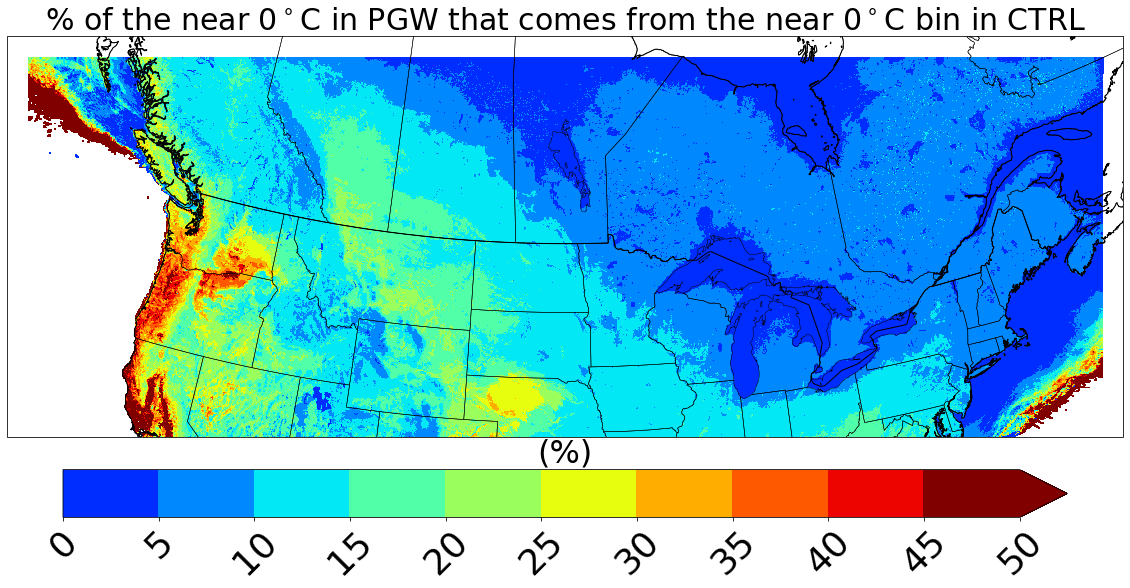

In [85]:
# How much of the near 0 peak in PGW comes from: Near 0C in CTRL
# total_near0PGW_near0CTRL / total_pgw_near0

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the near 0${\rm ^\circ C}$ in PGW that comes from the near 0${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_near0CTRL.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-81-8ee8dc1ac727>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


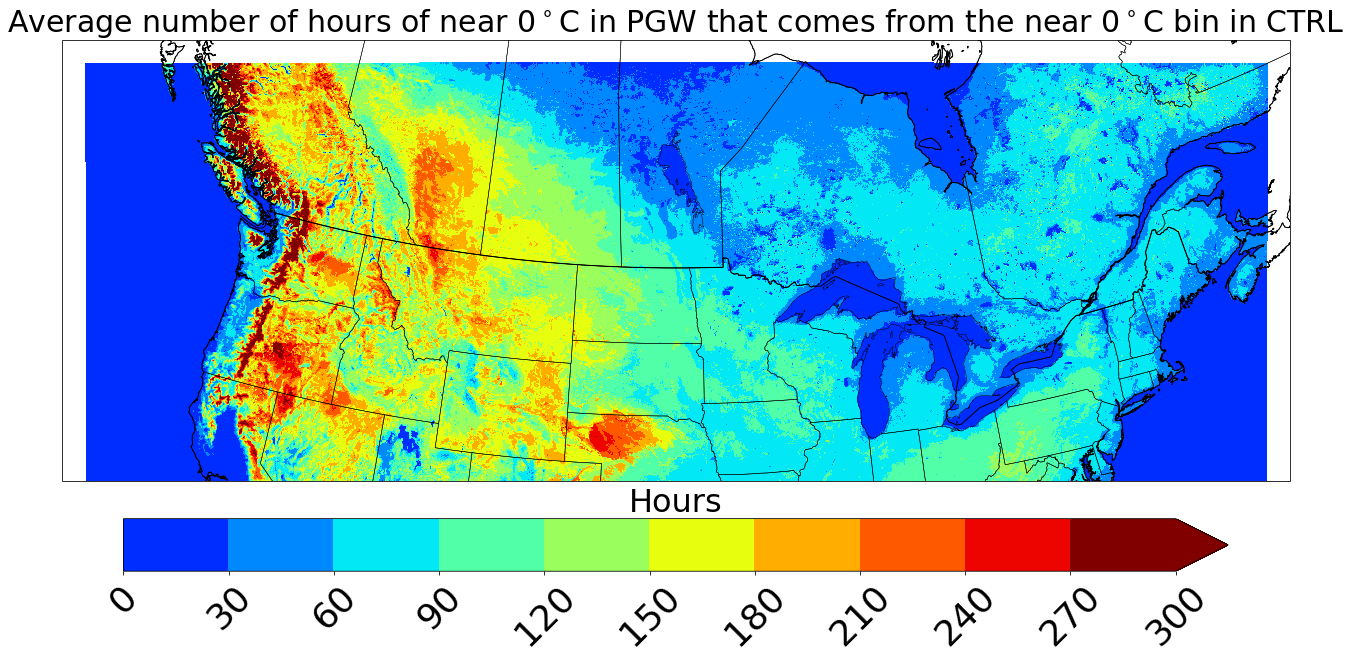

In [81]:
# How much of the near 0 peak in PGW comes from: Near 0C in CTRL
# total_near0PGW_near0CTRL ( NO perc)

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(22, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 300 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 30
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours of near 0${\rm ^\circ C}$ in PGW that comes from the near 0${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_near0CTRL'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_near0CTRL_noPerc.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-21-caf50b9d7b11>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_m4CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
<ipython-input-21-caf50b9d7b11>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


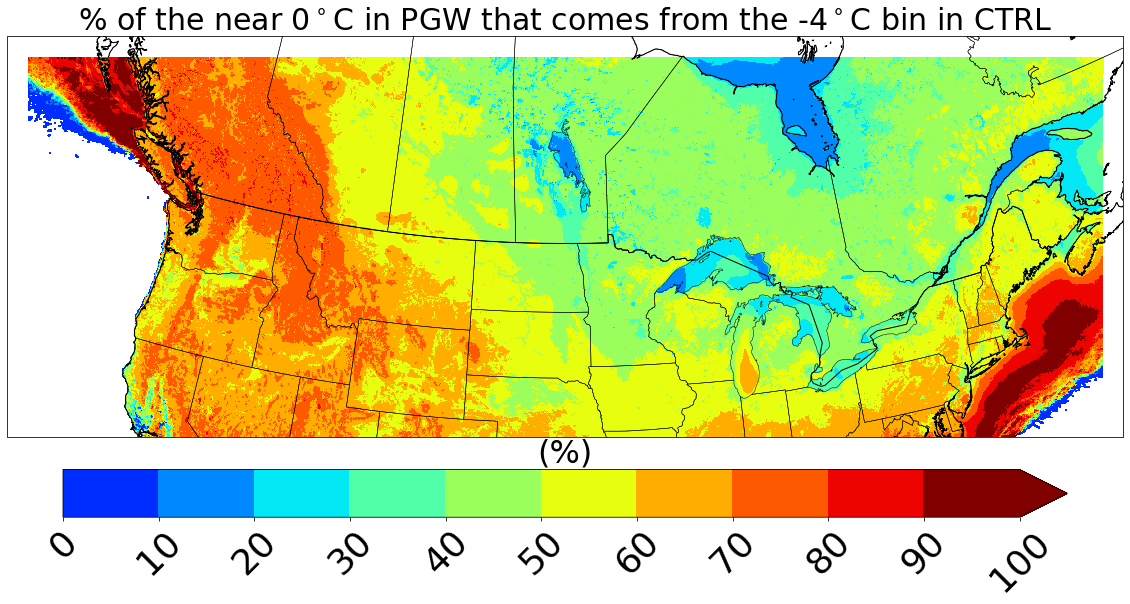

In [21]:
# How much of the near 0 peak in PGW comes from: -4C in CTRL
# total_near0PGW_m4CTRL / total_ctrl_minus4

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the near 0${\rm ^\circ C}$ in PGW that comes from the -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_m4CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_m4CTRL.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-80-dfc50549b764>:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('near0PGW_m4CTRL_noPerc.png', facecolor='white', bbox_inches='tight')


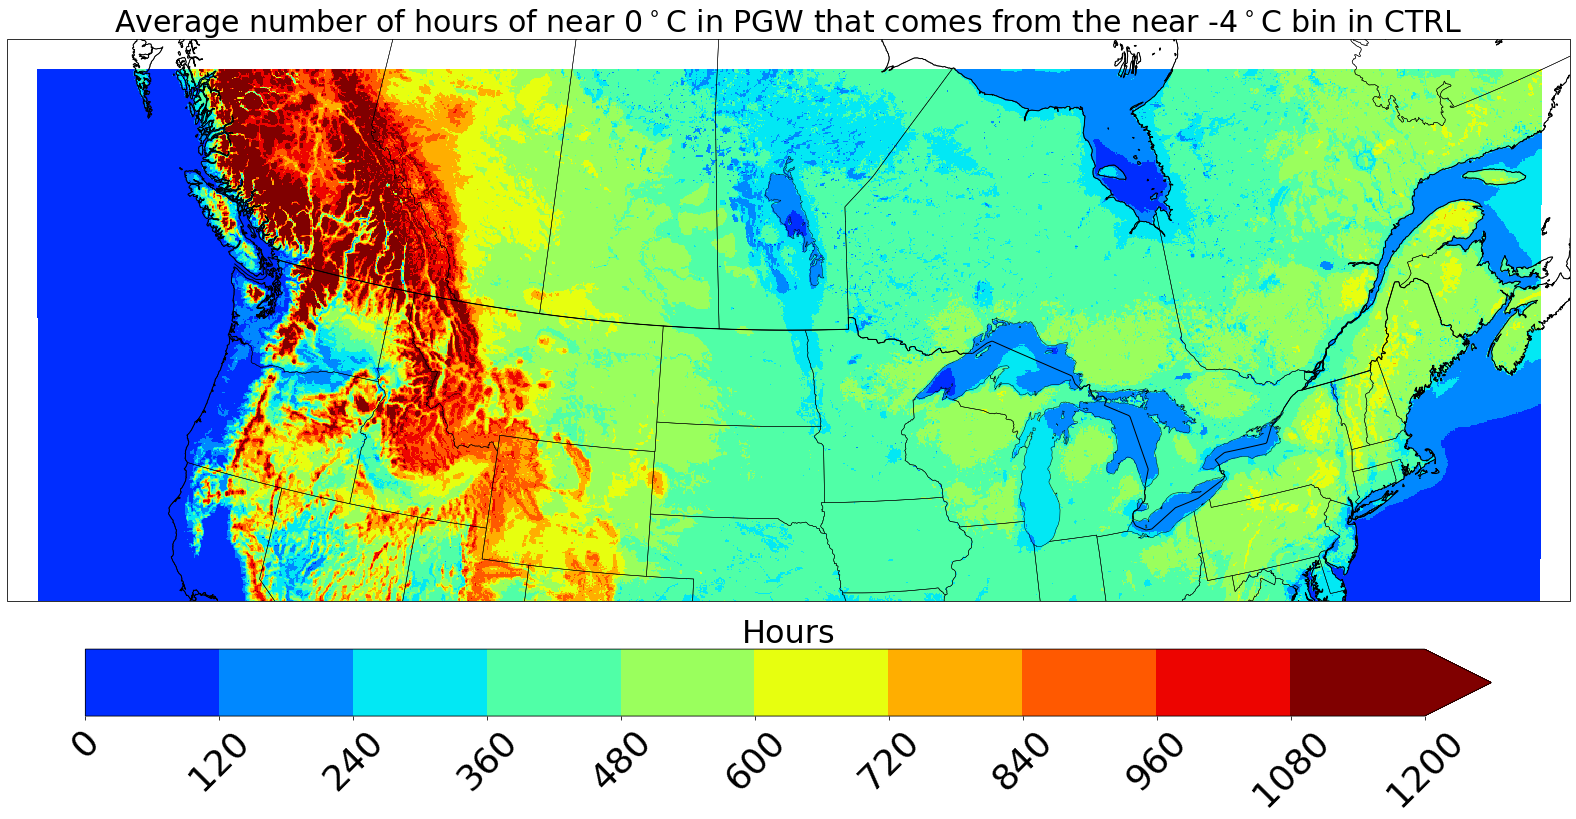

In [80]:
# How much of the near 0 peak in PGW comes from: -4C in CTRL
# total_near0PGW_m4CTRL no Perc

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(22, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 1200 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 120
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours of near 0${\rm ^\circ C}$ in PGW that comes from the near -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_m4CTRL'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

#plt.tight_layout()
f.set_tight_layout(True)
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_m4CTRL_noPerc.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-22-ace5d63aaa1a>:36: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_m8CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
<ipython-input-22-ace5d63aaa1a>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


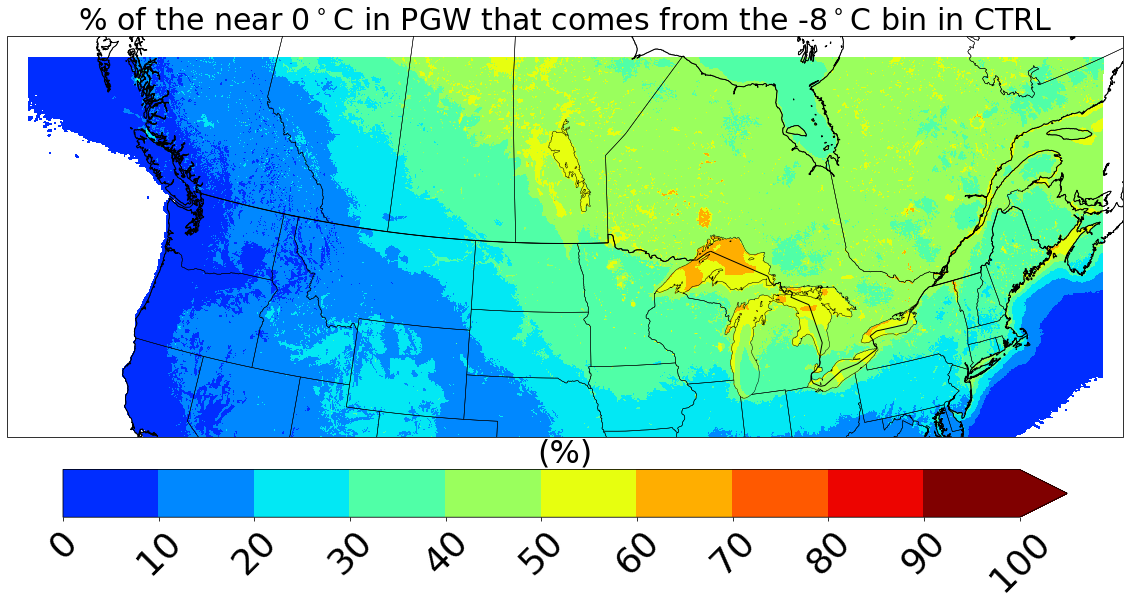

In [22]:
# How much of the near 0 peak in PGW comes from: -4C in CTRL
# total_near0PGW_m8CTRL / total_ctrl_minus8

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"% of the near 0${\rm ^\circ C}$ in PGW that comes from the -8${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_m8CTRL'].values*100/aux1['total_pgw_near0'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_m8CTRL.png', facecolor='white', bbox_inches='tight')
plt.show()

<ipython-input-84-9838469309dd>:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


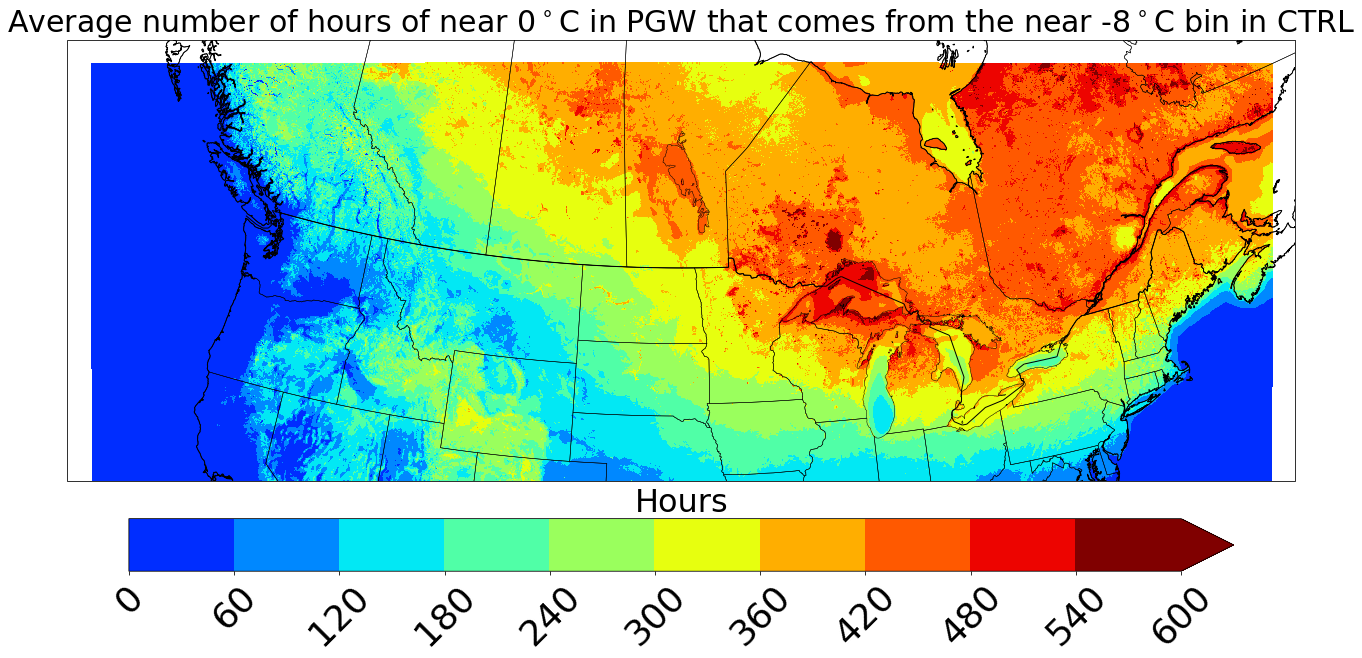

In [84]:
# How much of the near 0 peak in PGW comes from: -4C in CTRL
# total_near0PGW_m8CTRL no PErc

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(22, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 600 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 60
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours of near 0${\rm ^\circ C}$ in PGW that comes from the near -8${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0PGW_m8CTRL'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=30)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0PGW_m8CTRL_noPerc.png', facecolor='white', bbox_inches='tight')
plt.show()

In [24]:
# Opening the distribution files
fo = '/chinook/cruman/Data/Near0Events/Distribution'
# Get the average number of hours near 0
l = np.arange(-50,48,4)
xi = 1015 
yi = 1359 
dist = np.zeros((xi, yi, len(l)))
dist_pgw = np.zeros((xi, yi, len(l)))

t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")
        sim='CTRL'
        aux = pickle.load( open(f'{fo}/dist_{sim}_{y}_{m:02d}.p', 'rb'))
        #print(f'{fo}/t2m_{y}_{m:02d}.p')
        dist += aux
        sim = 'PGW'
        aux = pickle.load( open(f'{fo}/dist_{sim}_{y}_{m:02d}.p', 'rb'))
        dist_pgw += aux
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [25]:
# Function to find the two peaks in the distribution
def get_2peaks(dist):
    from scipy.signal import find_peaks

    #t = time.process_time()
    peaks, x = find_peaks(dist, height=0, distance=1)

    # get the first and second peak
    heights = x['peak_heights']
    sort_index = np.argsort(heights)
    first = peaks[sort_index[-1]]
    if len(sort_index) == 1:
        second = -1
    else:        
        second = peaks[sort_index[-2]]
    
    return first, second

# Finding the first and secondary peaks for CTRL
first = np.zeros((xi, yi))
second = np.zeros((xi, yi))

for i in range(first.shape[0]):
    for j in range(first.shape[1]):
        p1, p2 = get_2peaks(dist[i,j])
        first[i,j] = p1
        second[i,j] = p2
        
# Finding the first and secondary peaks for PGW
first_pgw = np.zeros((xi, yi))
second_pgw = np.zeros((xi, yi))

for i in range(first.shape[0]):
    for j in range(first.shape[1]):
        p1, p2 = get_2peaks(dist_pgw[i,j])
        first_pgw[i,j] = p1
        second_pgw[i,j] = p2

In [26]:
# Combines the first and second peak
first_second = np.where((first==13) | (second==13), 1, 0)
first_second_pgw = np.where((first_pgw==13) | (second_pgw==13), 1, 0)

# First peak near 0
near0_p1_ctrl = np.where(first==13, 2, 0)
near0_p1_pgw = np.where(first_pgw==13, 2, 0)

# Second peak near 0
near0_p2_ctrl = np.where(second==13, 3, 0)
near0_p2_pgw = np.where(second_pgw==13, 3, 0)

# Combining the two to plot the map of first and secondary peak
near0_p1p2_ctrl = near0_p1_ctrl + near0_p2_ctrl
near0_p1p2_pgw = near0_p1_pgw + near0_p2_pgw

In [53]:
first_ctrl_pgw = np.where((first==13) & (first_pgw==13), 1, 0)

<ipython-input-82-f9842cc69cbe>:29: RuntimeWarning: invalid value encountered in true_divide
  values_masked = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values
<ipython-input-82-f9842cc69cbe>:54: RuntimeWarning: invalid value encountered in true_divide
  values_masked = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values
<ipython-input-82-f9842cc69cbe>:76: RuntimeWarning: invalid value encountered in true_divide
  values_masked = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values
<ipython-input-82-f9842cc69cbe>:100: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('near0PGW_near0CTRL_masked.png', facecolor='white', bbox_inches='tight')


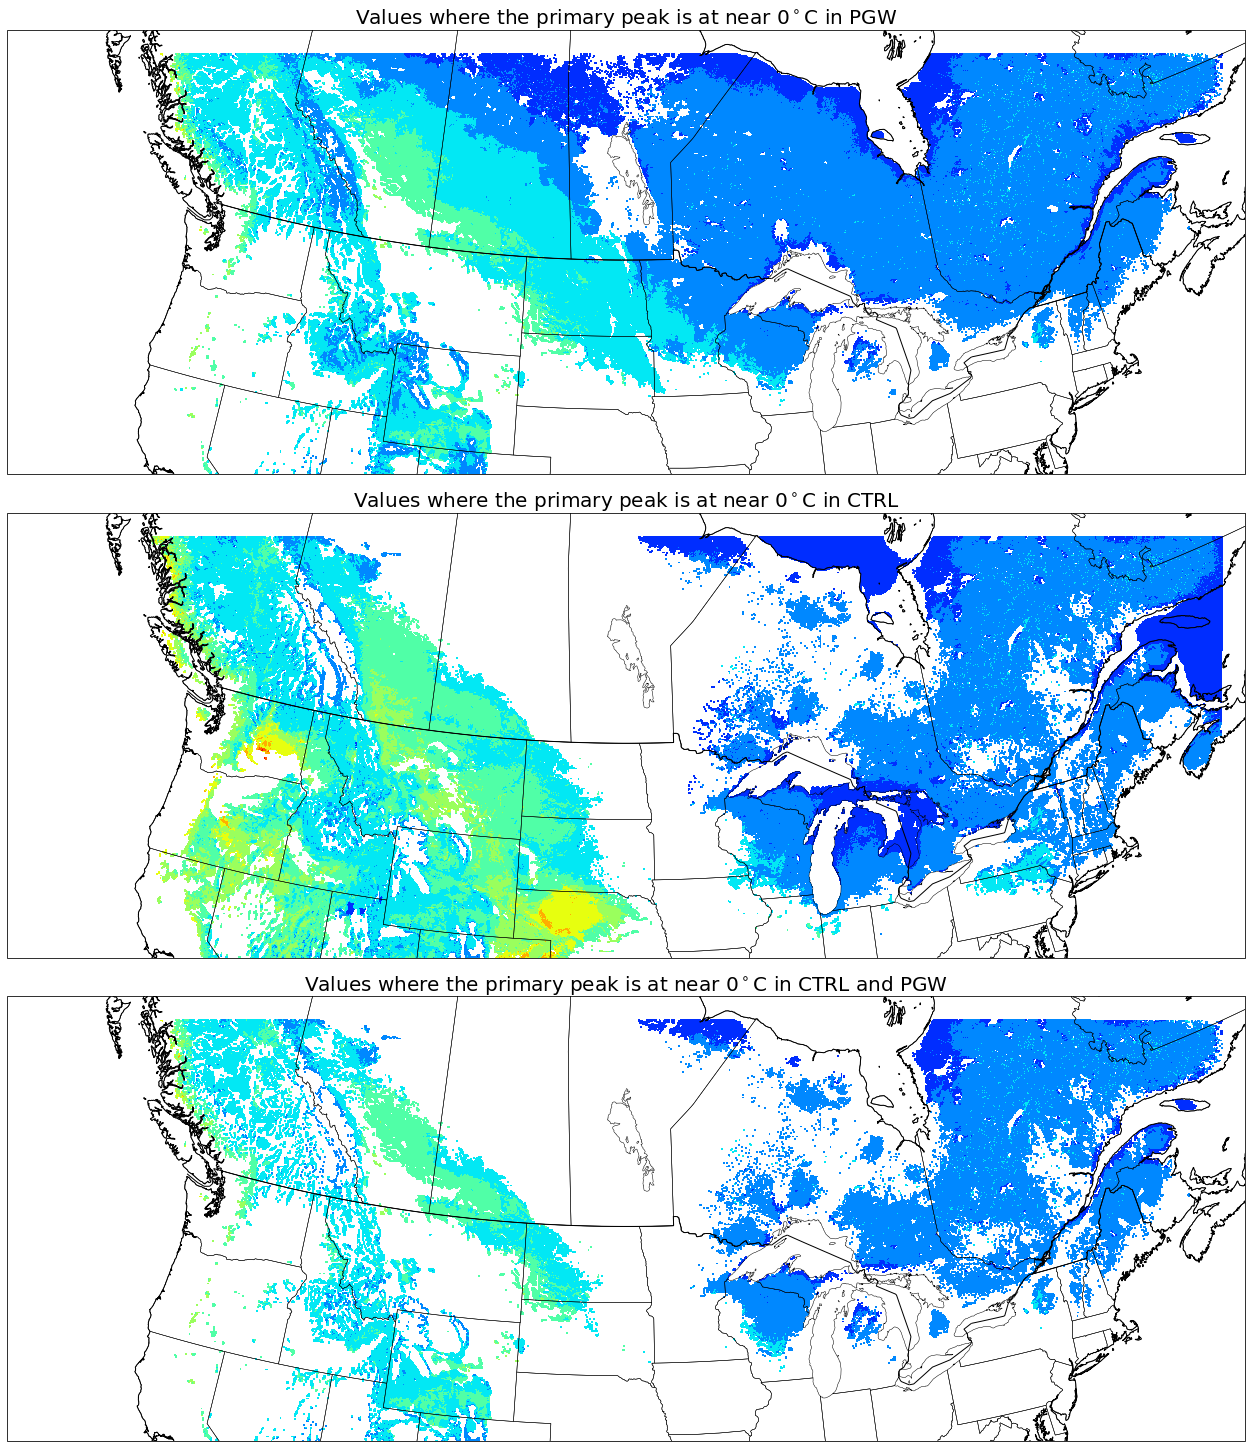

In [82]:
# Masking the plots made before with the P1 and P2 peaks

# How much of the near 0 peak in PGW comes from: Near 0C in CTRL
# total_near0PGW_near0CTRL / total_pgw_near0

myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(3, 1, figsize=(20, 20), subplot_kw={'projection': myLambert}, constrained_layout=True)

width = 1.0  

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)

title=r"Values where the primary peak is at near 0${\rm ^\circ C}$ in PGW"

ax[0].set_extent([xll-6.6, xur-9.65, 36, yur+2])

values_masked = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values
values_masked[near0_p1_pgw != 2] = np.nan

# Plot figure
cs = ax[0].pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, values_masked, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[0], ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.7, extend="max")        
#cb.ax.set_title(unit, fontsize=28)
#cb.ax.tick_params(labelsize=28, labelrotation=45)
        
ax[0].set_title(title, fontsize=20)

ax[0].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[0].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[0].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

# #########################
# Plot 2
title=r"Values where the primary peak is at near 0${\rm ^\circ C}$ in CTRL"

ax[1].set_extent([xll-6.6, xur-9.65, 36, yur+2])

values_masked = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values
values_masked[near0_p1_ctrl != 2] = np.nan

# Plot figure
cs = ax[1].pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, values_masked, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
#cb = f.colorbar(cs, ax=ax[2], ticks=color_ticks,orientation="vertical",pad=0.05,shrink=0.9, extend="neither")        
#cb.ax.set_title(unit, fontsize=32)
#cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax[1].set_title(title, fontsize=20)

ax[1].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[1].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[1].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)

##############
# Plot 3

# Plot figure
values_masked = aux1['total_near0PGW_near0CTRL'].values*100/aux1['total_pgw_near0'].values
values_masked[first_ctrl_pgw != 1] = np.nan
cs = ax[2].pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, values_masked, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
ax[2].set_extent([xll-6.6, xur-9.65, 36, yur+2])
# Plot colorbar

title=r"Values where the primary peak is at near 0${\rm ^\circ C}$ in CTRL and PGW"
ax[2].set_title( title, fontsize=20)

ax[2].coastlines(resolution='10m', linewidth=width, zorder=1)
ax[2].add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax[2].add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)

#plt.colorbar(im, cax=cax);
#cb = f.colorbar(cs, ax=ax[2], ticks=color_ticks,orientation="vertical",pad=0.05,shrink=0.9, extend="neither")        
#cb.ax.set_title(unit, fontsize=32)
#cb.ax.tick_params(labelsize=36, labelrotation=45)

#######################
#title = r"% of the near 0${\rm ^\circ C}$ in PGW that comes from the near 0${\rm ^\circ C}$ bin in CTRL"
#plt.suptitle(title, fontsize=30)
#plt.tight_layout()    

plt.savefig('near0PGW_near0CTRL_masked.png', facecolor='white', bbox_inches='tight')
plt.show()